In [9]:
####################################################################
###    This is the PYTHON version of program 3.1 from page 58 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIS model with two different risk-groups.			   #
####################################################################

In [10]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*beta is the matrix of transmission rates and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*nH is the proportion of the population that are in the high risk group

*IH is the initial proportion of the population that are both infectious and in the high risk group.

*IL is the initial proportion of the population that are both infectious and in the low risk group.

In [11]:
beta=[10., 0.1, 0.1, 1.]
gamma=1.0
nH=0.2
IH=1e-5
IL=1e-3
nT=1.0
nL=nT-nH
SH=nH-IH
SL=nL-IL
ND=15.
TS=1.0
INPUT = (SH,IH,SL,IL)

In [12]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP   
	Y[0] = - (beta[0] * V[1] + beta[1] * V[3]) * V[0] + gamma * V[1]
	Y[1] = (beta[0] * V[1] + beta[1] * V[3]) * V[0] - gamma * V[1]
	Y[2] = - (beta[2] * V[1] + beta[3] * V[3]) * V[2] + gamma * V[3]
	Y[3] = (beta[2] * V[1] + beta[3] * V[3]) * V[2] - gamma * V[3]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print(RES)


[[1.99990000e-01 1.00000000e-05 7.99000000e-01 1.00000000e-03]
 [1.99941123e-01 5.88772449e-05 7.99179728e-01 8.20271892e-04]
 [1.99814089e-01 1.85910557e-04 7.99320639e-01 6.79360917e-04]
 [1.99474560e-01 5.25439526e-04 7.99419957e-01 5.80043256e-04]
 [1.98565635e-01 1.43436536e-03 7.99458590e-01 5.41409647e-04]
 [1.96176296e-01 3.82370419e-03 7.99377200e-01 6.22799640e-04]
 [1.90224201e-01 9.77579899e-03 7.99021914e-01 9.78085905e-04]
 [1.77213697e-01 2.27863031e-02 7.98060594e-01 1.93940634e-03]
 [1.55434749e-01 4.45652512e-02 7.96005254e-01 3.99474600e-03]
 [1.31322917e-01 6.86770831e-02 7.92634422e-01 7.36557806e-03]
 [1.14281401e-01 8.57185993e-02 7.88445779e-01 1.15542207e-02]
 [1.05672717e-01 9.43272829e-02 7.84247161e-01 1.57528392e-02]
 [1.02044492e-01 9.79555078e-02 7.80548020e-01 1.94519801e-02]
 [1.00624879e-01 9.93751206e-02 7.77502572e-01 2.24974279e-02]
 [1.00078652e-01 9.99213478e-02 7.75080421e-01 2.49195793e-02]
 [9.98643552e-02 1.00135645e-01 7.73188498e-01 2.681150

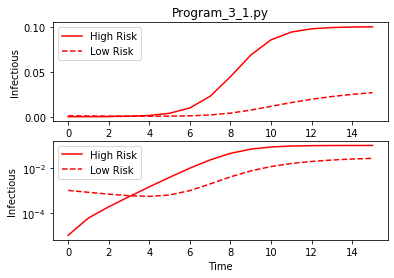

In [13]:
#Ploting
pl.subplot(211)
pl.plot(RES[:,1], '-r', label='High Risk')
pl.plot(RES[:,3], '--r', label='Low Risk')
pl.legend(loc=0)
pl.title('Program_3_1.py')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(212)
pl.semilogy(RES[:,1], '-r', label='High Risk') #Make the plot with log scaling on the y axis.
pl.semilogy(RES[:,3], '--r', label='Low Risk')#Make the plot with log scaling on the y axis.
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()